In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # Notes from [CSC 411](http://www.cs.toronto.edu/~rgrosse/courses/csc411_f18/)
 ---

 ## Lecture 5 - Ensembles (Part II)

 A *weak* learner is a learning algorithm that outputs
 a hypothesis (e.g. a classifier) that performs only slightly better
 than by chance.

 Examples: decision stumps (trees with only one split).

 *Boosting*:
 train (weak) classifiers sequentially,
 each time focusing on training data points
 that were previously misclassified.

 *Adaptive boosting* (AdaBoost):
 - at each iteratiion, assigning larger weights $w_i$
 to data points $x_i$ that were mis-classified;
 - ensemble classifier $H$ is the weighted sum
 of the weak classifiers $h_j$;
 - bias is reduced by making subsequent classifiers
 focus on their predecessors' mistakes;
 - Steps:
   1. given training dataset of size $N$ with $x_i \in \mathbb{R}^d$,
 $y_i \in \{-1, 1\}$ (i.e. two classes);
    2. initialize weights as $w_i = \frac{1}{N}$;
    3. for iteration $m$,
       $\begin{align} \epsilon_m &= \frac{\sum\limits_{i=1}^N w_i 1_{h(x_i) \neq y_i}}{\sum\limits_{i=1}^N w_i} \\ \alpha_m &= \frac{1}{2} \ln \left( \frac{1 - \epsilon_m}{\epsilon_m} \right) \\ w_{i,m+1} &= w_{i,m} \exp \left(-\alpha_m y_i h_m(x_i) \right) \end{align}$;
    4. $H(x) = \mathrm{sgn} \left(\sum_{m=1}^M a_m h_m(x) \right)$.


 AdaBoost can be interpreted as a stage-wise estimation procedure
 for an additive logistic regression model
 wherein the minimized loss function is $L(y, h(x)) = \mathrm{E}[\mathrm{e}^{-y h(x)}]$.

 Assuming each weak learning has error $\epsilon_m \leq \frac{1}{2} - \gamma \; \forall \; m$,
 the training error of $H(x)$ is $L_N(H) = \frac{1}{N} \sum\limits_{i=1}^N 1_{H(x_i) \neq y_i} \leq \mathrm{e}^{-2 \gamma^2 M}$

 ## Lecture 6 - Linear Regression

 Problem:
 Given observations $\{(x_N, t_N)\}$,
 find parameters $w \in \mathbb{R}^{K \times 1}, b \in \mathbb{R}^{N \times 1}$
 such that $y = X w + b$ and $t_n \approx y_n$,
 where $X \in \mathbb{R}^{N \times K}$ and $y \in \mathbb{R}^\times{N \times 1}$

 Define square-error loss function: $\mathcal{L}(y_n, t_n) = \frac{1}{2}(y_n - t_n)^2$.

 Define cost function: $\begin{align} \mathcal{C} &= \frac{1}{N} \sum\limits_{n=1}^N \mathcal{L}(y_n, t_n) \\ &= \frac{1}{2 N} \sum\limits_{n=1}^N (x_n w + b_n - t_n)^2 \end{align}$.

 Minimize $\mathcal{C}$ by setting partial derivatives to zero
 gives $w = (X^\mathsf{T} X)^{-1} X^\mathsf{T} t$.

 Alternatively, use *gradient descent* (iterative algorithm for optimization).
 - initialize $w_k$ to some value;
 - update them by $w_k \leftarrow w_k - \alpha \frac{\partial \mathcal{C}}{\partial w_k} = w_k - \frac{\alpha}{N} \sum\limits_{n=1}^N (y_n - t_n) x_{n,k}$
 - in vector form, $w \leftarrow w - \alpha \: \nabla_w \mathcal{C} = w - \frac{\alpha}{N} X^\mathsf{T} (y - t)$;
 - $\alpha$ is the *learning rate*;

 *Feature mapping*:
 - consider data that is modeled by $y = w_0 + w_1 x + w_2 x^2 + w_3 x^3$;
 - define the *feature map* $\psi(x) = \left[ 1 \: x \: x^2 \: x^3 \right]$;
 - we get back the same regression problem, $y = \psi(x)^\mathsf{T} w$
 - the degree of the polynomial is a hyperparameter like $k$ in kNN
 and it can be tuned using cross-validation (training, validation, test);
 - alternative to tuning is *regularization*.


 Regularization:
 - a *regularizer* is a function that quantifies the cost of one hypothesis vs. another;
 - it appears as an extra term $\mathcal{R}$ in the cost function,
 $\mathcal{L} \rightarrow \mathcal{L} + \lambda \mathcal{R}$;
 - an example is the $L^2$ regularizer, $\mathcal{R} = \frac{1}{2} |w|^2$;
 - $\lambda$ is a hyperparameter to be tuned by cross-validation again;
 - thus, $w \leftarrow \begin{align} & w - \alpha \: \nabla_w \mathcal{C} \\ &= (1-\alpha \lambda)w - \alpha \end{align}$
 - or $w(n) \sim \mathrm{e}^{-\lambda n}$
 - $L^1$ regularization is $\mathcal{R} = |w|^1$.



 ## Lecture 7 - Linear Classification (Part I)

 Classification:
 predicting discrete-valued targets ($t \in \{0, 1\}$).

 Binary classification is equivalent to linear regression:
 $\begin{align} z &= x^\mathsf{T} w \\ y &= \begin{cases} 1 & z \leq 0 \\ 0 & z > 0 \end{cases} \end{align}$

 However, the function $y(z)$ needs to be differentiable
 for gradient descent to work:
 use $y(z) = \sigma(z)$ where $\sigma(z) = \frac{1}{1 + \mathrm{e}^{-z}}$.

 We can use $\mathcal{L}_\textrm{SE}(y, t) = \frac{1}{2}(y - t)^2$
 or the *cross-entropy loss* function:
 - $\begin{align} \mathcal{L}_\textrm{CE}(y, t) &= \begin{cases} -\ln y & t = 1 \\ -ln(1-y) & t = 0 \end{cases} \\ &= -t \ln y - (1-t)\ln(1-y) \end{align}$


 For numerical stability, combine both the logistic activation function
 with the cross-entropy loss function as one:
 - the *logistic cross-entropy loss*;
 - $\mathcal{L}_\textrm{LCE} = t\ln(1+\mathrm{e}^{-z}) + (1-t)\ln(1+\mathrm{e}^{-z})$;
 - `L_LCE = t * np.logaddexp(0, -z) + (1 - t) * np.logaddexp(0, z)`.



C:\Users\LM242\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


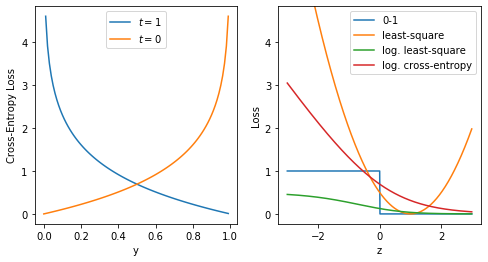

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic

y = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
_ = 0
ax[_].plot(y, -np.log(y), label = '$t = 1$')
ax[_].plot(y, -np.log(1 - y), label = '$t = 0$')
ax[_].set_xlabel('y')
ax[_].set_ylabel('Cross-Entropy Loss')
_ = ax[_].legend()

_ = 1
z = np.arange(-3, 3, 0.01)
ax[_].plot(z, np.heaviside(-z, 0.5), label = '0-1')
ax[_].plot(z, 0.5*(z - 1)**2, label = 'least-square')
ax[_].plot(z,  0.5*(logistic.cdf(z) - 1)**2, label = 'log. least-square')
ax[_].plot(z, np.logaddexp(0, -z) , label = 'log. cross-entropy')
ax[_].set_ylim(ax[_-1].get_ylim())
ax[_].set_xlabel('z')
ax[_].set_ylabel('Loss')
_ = ax[_].legend()



 ## Lecture 8 - Linear Classification (Part II)

 Gradient checking:
 - check if partial derivatives in gradient descent calculation
 is correct;
 - two-sided definition,
 $\frac{\partial}{\partial x_i}f(x_1, \ldots, x_i, \ldots, x_N) = \lim\limits_{h \rightarrow 0} \frac{f(x_1, \ldots, x_i + h, \ldots, x_N) - f(x_1, \ldots, x_i - h, \ldots, x_N)}{2 h}$
 - relative error, $\frac{|a - b|}{|a| + |b|} \ll 10^{-6}$.


 Stochastic gradient descent (SGD):
 - the cost function and its gradient requires summing over all training examples
 - this is called *batch training*, $\frac{\partial \mathcal{C}}{\partial \theta} = \frac{1}{N} \sum\limits_{n = 1}^N \mathcal{C}(y(x_n), \theta), t_n)$;
 - alternative:
 update the model parameters using a gradient calculated
 over a subset of $S$ training examples (*mini-batch*);
 - i.e. $\theta \leftarrow \theta - \alpha \frac{1}{S} \sum\limits_{n=1}^S \frac{\partial \mathcal{C}}{\partial \theta}$
 - Every pass over the entire training set is called an *epoch*;
 - advantage is that the stochastic gradients have $\frac{1}{S}$ smaller variances
 than the individual gradients;
 - $S$ is a hyperparameter to be cross-validated.


 Convexity:
 - a set $S$ is *convex* if any line segment connecting points in $S$
 lies entirely in $S$,
 $x_1, x_2 \in S \; \Rightarrow \; \lambda x_1 + (1 - \lambda) x_2 \in S \; \forall \; 0 \leq \lambda \leq 1$;
 corollary, weighted averages (i.e. convex combinations)
 do lie within the set;
 - a *convex function* is one for which
 $f(\lambda x_1 + (1 - \lambda) x_2) \leq \lambda f(x_1) + (1 - \lambda) f(x_2)$
 - all critical points of convex functions are minima;
 - gradient descent does find the optimal solution in such cases.


 Multiclass linear classification:
 - classification with more than two categories;
 - express multiclass targets as *one-hot* or *one-of-K* vectors,
 $t = [0\: \cdots \: 0 \: 1 \: 0\: \cdots 1]$;
 - this can be written as $z_k = \sum\limits_n w_{kn} x_n + b_k$ or $z = W X + b$
 where $W$ is a $K \times N$ weight matrix;
 - a useful activation function is the *softmax* function
 (i.e. *soft-argmax* or Boltzmann),
 $y_k = \mathrm{softmax}(z_1,\ldots,z_K)_k = \sigma(z)_k = \frac{\mathrm{e}^{z_k}}{\sum\limits_{k^\prime} \mathrm{e}^{z_{k^\prime}}}$;
 - the inputs $z_k$ are called *logits*;
 - use the cross-entropy as loss function:
 $\mathcal{L}(y, t) = - \sum\limits_{k=1}^K t_k \ln(y_k) = - t^\mathsf{T} \ln(y)$
 - altogether: the *softmax-cross-entropy* function
 - steps:
    1. $z = W x + b$;
    2. $y = \mathrm{softmax}(z)$;
    3. $\mathcal{L} = -t^\mathsf{T} \ln(y)$;


 Limits of linear classification
 - the outputs of the $\mathrm{XOR}$ function
 are not linearly separable but can still be classified using a feature map,
 $\psi([x_1 \; x_2]) = [x_1 \; x_2 \; x_1 x_2]$;
 - general solution: use neural networks to learn nonlinear hypotheses.




